##### 인구증가율과 고령인구비율간의 회귀분석

In [1]:
# X : 인구증가율(%),  y : 노령인구비율(%)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

X = np.array(X)
y = np.array(y)

len(X), len(y)

(16, 16)

In [2]:
# 프로그래밍의 흐름을 미리 살펴보자.
# a와 b를 (0, 1]구간(0 < a, b <= 1 : ():열린구간, []:닫힌구간)의 랜덤한 값으로 초기화한다. 
# 잔차 제곱의 평균을 loss로 하고 반환하는 함수를 정의한다.
# 이렇게 정의된 compute_loss값을 최소화하는 것이고 이런 과정이 딥러닝을 포함해 머신러닝의 주요 알고리즘이다.
# 최적화함수(optimizer)는 이 과정(복잡한 미분 계산 및 가중치 업데이트)을 자동으로 진행해주는 편리한 도구이다.
# Tensorflow 2.0에서는 여러 곳에 분산돼 있던 optimizer를 tf.optimizers안에 모았고 여기서 Adam optimizer를 부른다.
# SGD와 함께 Adam도 가장 많이 사용되는 최적화함수 중 하나이다. 
# 적당한 학습률을 넣으면 Adam은 안정적이고 효율적으로 학습한다. 여기선 0.07을 사용했다. 보통[0.0001, 0.1]
# 1000번의 학습을 거쳐 a와 b는 compute_loss값을 최소화하는 적절한 값에 도달한다.

In [3]:
# a와 b를 랜덤한 값으로 초기화한다.
a = tf.Variable(random.random())    # random() -> x in the interval (0,1]
b = tf.Variable(random.random())

# 잔차 제곱의 평균을 반환하는 함수
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((y - y_pred) ** 2)
    return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)

for i in range(1000):
    # 잔차 제곱이 평균을 최소화(minimize)한다.
    optimizer.minimize(compute_loss, var_list=[a, b])
    
    if i % 100 == 99:
        print(f"{i:3d}  a :  {a.numpy():8.4f}     b : {b.numpy():8.4f}     loss : {compute_loss().numpy():10.6f}")

 99  a :    0.1189     b :   6.7252     loss :  89.592041
199  a :   -0.1188     b :  11.2100     loss :  29.619801
299  a :   -0.2574     b :  13.8172     loss :  13.203075
399  a :   -0.3222     b :  15.0375     loss :  10.179031
499  a :   -0.3465     b :  15.4932     loss :   9.811754
599  a :   -0.3537     b :  15.6294     loss :   9.782395
699  a :   -0.3554     b :  15.6620     loss :   9.780857
799  a :   -0.3558     b :  15.6682     loss :   9.780805
899  a :   -0.3558     b :  15.6692     loss :   9.780804
999  a :   -0.3558     b :  15.6693     loss :   9.780804


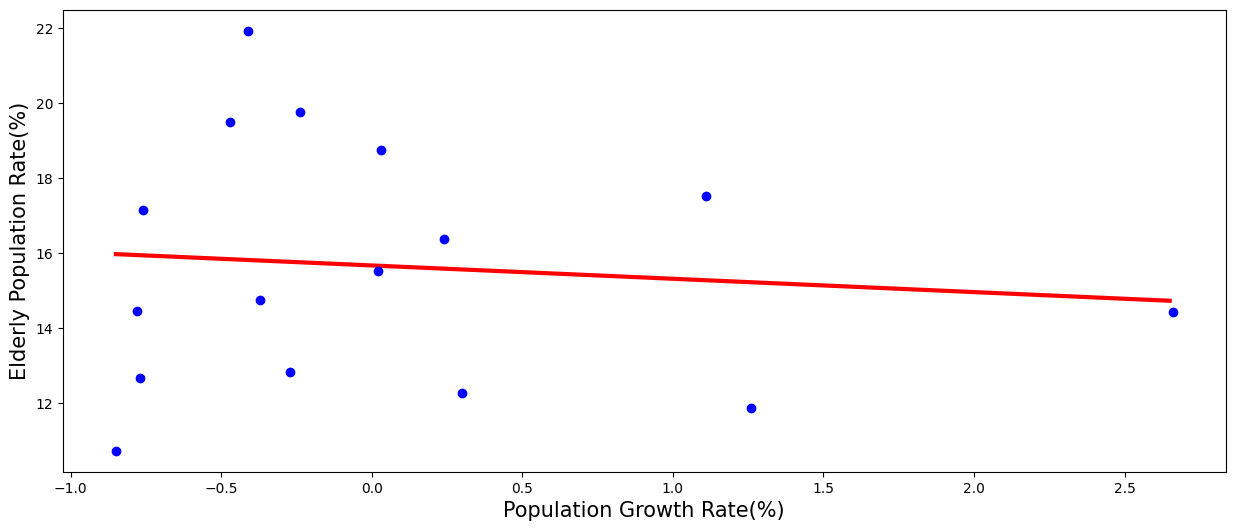

In [4]:
plt.rcParams['figure.figsize'] = (15, 6)
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그린다.
plt.plot(line_x, line_y, 'r-', linewidth=3)
plt.plot(X, y, 'bo')
plt.xlabel('Population Growth Rate(%)', size=15)
plt.ylabel('Elderly Population Rate(%)', size=15)
plt.show()

##### 이렇게 얻은 회귀선이 데이터를 잘 반영하고 있지 않아서 다항회귀를 시도해보자.

In [5]:
# a, b, c를 랜덤한 값으로 초기화한다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차 제곱의 평균을 반환하는 함수를 정의한다.
def compute_loss():
    y_pred = a * X ** 2 + b * X + c
    loss = tf.reduce_mean((y - y_pred) ** 2)
    return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [a,b,c])
    if i % 100 == 99:
        print(f"{i:3d}  a :  {a.numpy():8.4f}     b : {b.numpy():8.4f}     c : {c.numpy():8.4f}    loss : {compute_loss().numpy():10.6f}")

 99  a :    3.9274     b :  -5.8019     c :   6.8128    loss :  64.374367
199  a :    2.6862     b :  -4.3026     c :  10.5112    loss :  29.918396
299  a :    1.1891     b :  -2.1019     c :  13.0806    loss :  15.424177
399  a :    0.2649     b :  -0.7429     c :  14.6695    loss :  10.793941
499  a :   -0.2204     b :  -0.0296     c :  15.5055    loss :   9.686592
599  a :   -0.4395     b :   0.2924     c :  15.8831    loss :   9.486569
699  a :   -0.5249     b :   0.4179     c :  16.0303    loss :   9.459185
799  a :   -0.5536     b :   0.4601     c :  16.0799    loss :   9.456347
899  a :   -0.5620     b :   0.4724     c :  16.0943    loss :   9.456125
999  a :   -0.5641     b :   0.4755     c :  16.0979    loss :   9.456110


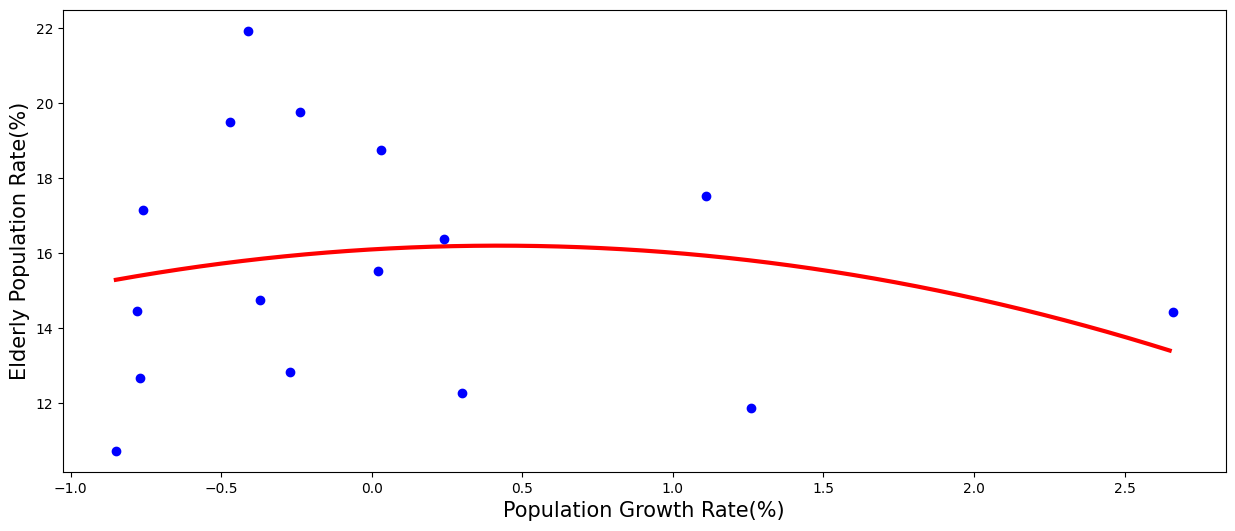

In [6]:
plt.rcParams['figure.figsize'] = (15, 6)
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그린다.
plt.plot(line_x, line_y, 'r-', linewidth=3)
plt.plot(X, y, 'bo')
plt.xlabel('Population Growth Rate(%)', size=15)
plt.ylabel('Elderly Population Rate(%)', size=15)
plt.show()

##### 텐서플로우를 이용해서 3차 함수 회귀선 구하기

In [9]:
# a, b, c, d를 랜덤한 값으로 초기화한다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차 제곱의 평균을 반화하는 함수를 정의한다.
def compute_loss():
    y_pred = a*X*X*X + b*X*X + c*X + d
    loss = tf.reduce_mean((y - y_pred)**2)
    return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[a, b, c, d])
    
    if i % 100 == 99:
        print(f"{i:3d}  a :  {a.numpy():8.4f}     b : {b.numpy():8.4f}     c : {c.numpy():8.4f}\
            d : {d.numpy():8.4f}     loss : {compute_loss().numpy():10.6f}")

 99  a :   -1.0904     b :   5.6241     c :  -3.7094            d :   6.1360     loss :  66.690384
199  a :   -1.9367     b :   6.8264     c :  -2.5141            d :   9.7366     loss :  31.936842
299  a :   -1.7227     b :   5.3473     c :  -1.0735            d :  11.9146     loss :  20.872967
399  a :   -1.0422     b :   3.1367     c :  -0.6032            d :  13.4289     loss :  14.872662
499  a :   -0.3439     b :   1.0770     c :  -0.4807            d :  14.5706     loss :  11.364949
599  a :    0.2235     b :  -0.5648     c :  -0.4356            d :  15.4342     loss :   9.498168
699  a :    0.6415     b :  -1.7699     c :  -0.4098            d :  16.0611     loss :   8.606632
799  a :    0.9299     b :  -2.6005     c :  -0.3929            d :  16.4922     loss :   8.224018
899  a :    1.1174     b :  -3.1407     c :  -0.3820            d :  16.7724     loss :   8.076381
999  a :    1.2326     b :  -3.4725     c :  -0.3754            d :  16.9444     loss :   8.025199


In [10]:
# a, b, c, d를 랜덤한 값으로 초기화한다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차 제곱의 평균을 반화하는 함수를 정의한다.
def compute_loss():
    y_pred = a*X**3 + b*X**2 + c*X + d
    loss = tf.reduce_mean((y - y_pred)**2)
    return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[a, b, c, d])
    
    if i % 100 == 99:
        print(f"{i:3d}  a :  {a.numpy():8.4f}     b : {b.numpy():8.4f}     c : {c.numpy():8.4f}\
            d : {d.numpy():8.4f}     loss : {compute_loss().numpy():10.6f}")

 99  a :   -1.4626     b :   6.4711     c :  -3.3276            d :   6.1644     loss :  64.408859
199  a :   -2.1108     b :   7.2596     c :  -2.4486            d :   9.7095     loss :  32.292686
299  a :   -1.7376     b :   5.3784     c :  -1.0741            d :  11.9055     loss :  20.934164
399  a :   -0.9909     b :   2.9773     c :  -0.5864            d :  13.4840     loss :  14.620710
499  a :   -0.2662     b :   0.8420     c :  -0.4593            d :  14.6708     loss :  11.081715
599  a :    0.3064     b :  -0.8114     c :  -0.4184            d :  15.5480     loss :   9.295242
699  a :    0.7159     b :  -1.9892     c :  -0.3976            d :  16.1661     loss :   8.491746
799  a :    0.9891     b :  -2.7740     c :  -0.3849            d :  16.5771     loss :   8.169419
899  a :    1.1602     b :  -3.2655     c :  -0.3771            d :  16.8343     loss :   8.054059
999  a :    1.2610     b :  -3.5551     c :  -0.3725            d :  16.9858     loss :   8.017256
